# Programming Assignment #3: Convolutional Networks
Author: Pierre Nugues

<h2>Objectives</h2>

The objectives of this assignment are to:
* Write a program to recognize flowers on images
* Learn how to manage an image data set
* Apply convolutional networks to images
* Know what Python generators are
* Understand class activation
* Write a short report on your experiments. This report is mandatory to pass the assignment.

## Organization

Each group will have to:
* Write Python programs to recognize the sort of flower in an image.
* Experiment different neural architectures and compare the results.

Each student will have to:
* Run at home Chollet's notebook: `5.4-visualizing-what-convnets-learn.ipynb`. The version available here https://github.com/fchollet/deep-learning-with-python-notebooks does not work with TensorFlow 2. Use the implementation available here: https://github.com/pnugues/edan95/tree/master/labs instead.
* Write an individual report on these experiments.

While not compulsory, I highly recommend that you use Google colab and run your program on a GPU. This is something you select when you run the notebook (runtime type). You will have to create a Google account for this: https://colab.research.google.com

As there are a few parameterization steps, I recommend that you start this lab as early as you can.

## Collecting a Dataset

1. You will collect a dataset from Kaggle (https://www.kaggle.com/). First register, it is free, and you will have access to lots of datasets.
2. Download the Flower corpus (https://www.kaggle.com/alxmamaev/flowers-recognition). You can find a local copy in the `/usr/local/cs/EDAN95/datasets` folder.
3. Split randomly your dataset into training, validation, and test sets: Use a 60/20/20 ratio. You will read all the file names and create a list of pairs, (file_name, category). You will then shuffle your list and save your partition of the data. To speed up the lab, you can also:
 * Start with the partition available in the `/usr/local/cs/EDAN95/datasets` folder; or
 * You can also run the code in the cells below (recommended).


In [18]:
import os
import random
import shutil
from tqdm import tqdm

# The machine name
machine_name = 'thomas'

# To create the same dataset
random.seed(0)
print(machine_name)

thomas


If you use Google colab (recommended). Use the GPU accelerator

In [19]:
if machine_name == 'colab':
    from google.colab import drive
    drive.mount("/content/drive")

In [20]:
# Here write the path to your dataset
if machine_name == 'thomas':
    base = '/Users/thoma/Desktop/EDAN95/lab3/archive/'
elif machine_name == 'pierre':
    base = '/Users/pierre/Documents/Cours/EDAN95/datasets/'
elif machine_name == 'colab': # If you run your notebook with colab
    base = '/content/drive/My Drive/Colab Notebooks/'
else: # If you run your notebook on your machine
    base = 'your folder'

In [21]:
original_dataset_dir = os.path.join(base, 'flowers/')
dataset = os.path.join(base, 'flowers_split')

train_dir = os.path.join(dataset, 'train')
validation_dir = os.path.join(dataset, 'validation')
test_dir = os.path.join(dataset, 'test')

categories = os.listdir(original_dataset_dir)
categories = [category for category in categories if not category.startswith('.')]
print('Image types:', categories)
data_folders = [os.path.join(original_dataset_dir, category) for category in categories]
data_folders

Image types: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


['/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/daisy',
 '/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/dandelion',
 '/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/rose',
 '/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/sunflower',
 '/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/tulip']

We build the (image, label) pairs

In [22]:
pairs = []
for folder, category in zip(data_folders, categories):
    images = os.listdir(folder)
    images = [image for image in images if not image.startswith('.')]
    pairs.extend([(image, category) for image in images])
pairs[:10]

[('100080576_f52e8ee070_n.jpg', 'daisy'),
 ('10140303196_b88d3d6cec.jpg', 'daisy'),
 ('10172379554_b296050f82_n.jpg', 'daisy'),
 ('10172567486_2748826a8b.jpg', 'daisy'),
 ('10172636503_21bededa75_n.jpg', 'daisy'),
 ('102841525_bd6628ae3c.jpg', 'daisy'),
 ('10300722094_28fa978807_n.jpg', 'daisy'),
 ('1031799732_e7f4008c03.jpg', 'daisy'),
 ('10391248763_1d16681106_n.jpg', 'daisy'),
 ('10437754174_22ec990b77_m.jpg', 'daisy')]

We define a split. We will run this part only once to create the partition into training, validation, and test sets.

In [23]:
#if not os.path.isdir(dataset):
random.shuffle(pairs)
img_nbr = len(pairs)
train_images = pairs[0:int(0.6 * img_nbr)]
val_images = pairs[int(0.6 * img_nbr):int(0.8 * img_nbr)]
test_images = pairs[int(0.8 * img_nbr):]

    # print(train_images)
print(len(train_images))
print(len(val_images))
print(len(test_images))


2595
865
866


We create the three subsets. We will run this part only once to create the partition into training, validation, and test sets.

In [24]:
#if not os.path.isdir(dataset):
for image, label in tqdm(train_images):
    src = os.path.join(original_dataset_dir, label, image)
    dst = os.path.join(train_dir, label, image)
    os.makedirs(os.path.dirname(dst), exist_ok=True)
    shutil.copyfile(src, dst)

for image, label in tqdm(val_images):
    src = os.path.join(original_dataset_dir, label, image)
    dst = os.path.join(validation_dir, label, image)
    print(src)
    os.makedirs(os.path.dirname(dst), exist_ok=True)
    shutil.copyfile(src, dst)

for image, label in tqdm(test_images):
    src = os.path.join(original_dataset_dir, label, image)
    dst = os.path.join(test_dir, label, image)
    os.makedirs(os.path.dirname(dst), exist_ok=True)
    shutil.copyfile(src, dst)

  8%|██████                                                                          | 65/865 [00:00<00:01, 648.45it/s]

/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/daisy\19653086178_28156b7ce4_m.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/dandelion\11465213433_847c4fa261.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/tulip\3511776685_3635087b12_n.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/tulip\17165583356_38cb1f231d_n.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/sunflower\175638423_058c07afb9.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/tulip\142235914_5419ff8a4a.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/tulip\8713394070_b24561b0a9.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/daisy\14471433500_cdaa22e3ea_m.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/dandelion\34562347042_e4dc06879a_n.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/daisy\5110109540_beed4ed162_m.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/sunflower\58636535_bc53ef0a21_m.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/dandelion\4633323785_20676ff9

 22%|████████████████▉                                                              | 186/865 [00:00<00:01, 625.88it/s]


/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/sunflower\4932736136_0115955987.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/tulip\5717951663_048431c2e6_n.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/rose\5002460856_c44a02442f_n.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/daisy\4694734757_5c563d38dd_n.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/rose\5156037859_1673720a11_m.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/tulip\14087361621_9fefb8dbef.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/rose\15060816740_68e1b2c31b.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/rose\5349254467_388ff94f8b_n.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/daisy\18023717391_e2c9089e10.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/tulip\8520482921_21dd204ebd_n.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/sunflower\21518663809_3d69f5b995_n.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/rose\9458445402_79e4dfa89c.jpg
/Users

 37%|█████████████████████████████▎                                                 | 321/865 [00:00<00:00, 651.20it/s]

/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/tulip\14116826873_d4bab623bf_n.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/dandelion\4645161319_c308fc31ef_n.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/dandelion\4134441089_c8c1e6132a.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/tulip\13974542496_e4b5d1c913_n.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/sunflower\3568114325_d6b1363497.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/tulip\738207467_fc59cfcd9b_z.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/tulip\443600168_cb08d56511.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/sunflower\6113021380_7546bf7ac7_n.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/tulip\2432389721_4d14971060_n.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/daisy\5896674046_a4879f718e_n.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/daisy\705422469_ffa28c566d.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/sunflower\3946535709_78613461cb

 54%|███████████████████████████████████████████                                    | 471/865 [00:00<00:00, 698.03it/s]


/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/rose\12240303_80d87f77a3_n.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/dandelion\1443259657_2704fab26e_n.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/daisy\5110107234_12ddc0206b_m.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/dandelion\8684108_a85764b22d_n.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/sunflower\15218421476_9d5f38e732_m.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/dandelion\4151883194_e45505934d_n.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/tulip\19915714271_3d8d6a23a5_n.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/sunflower\969913643_9d5cd2fe45_m.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/dandelion\3469112805_6cc8640236.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/sunflower\14889392928_9742aed45b_m.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/dandelion\15358221063_2c6e548e84.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/daisy\134409

 70%|███████████████████████████████████████████████████████▌                       | 609/865 [00:00<00:00, 690.85it/s]

/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/tulip\4263272885_1a49ea5209.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/daisy\450128527_fd35742d44.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/tulip\2427626706_ffdf697f84_n.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/dandelion\8740218495_23858355d8_n.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/rose\2713683760_d98cd2a05b_m.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/tulip\20876954720_62920b4ce8_n.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/sunflower\4818994715_9d90527d18_n.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/sunflower\9610371852_179e7781ce.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/sunflower\15054865217_e398d0dc9f_n.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/sunflower\4625255191_26e17a28c9_n.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/sunflower\8202034834_ee0ee91e04_n.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/tulip\8713388322_e5a

 78%|█████████████████████████████████████████████████████████████▋                 | 676/865 [00:01<00:00, 652.65it/s]


/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/sunflower\19915160340_ec904edbdf_n.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/dandelion\8738317694_eca2ce3bfc_n.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/daisy\2828733818_1c1ed0089d_n.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/daisy\5434913005_409c1e8b56_n.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/tulip\14674389605_df3c0bcfa1_m.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/sunflower\14921668662_3ffc5b9db3_n.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/tulip\4508346090_a27b988f79_n.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/sunflower\9558632814_e78a780f4f.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/tulip\7166606598_5d2cd307c3.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/daisy\7133935763_82b17c8e1b_n.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/daisy\2473825306_62fd5f8785_n.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/daisy\1955336401_fbb20

 93%|█████████████████████████████████████████████████████████████████████████▎     | 803/865 [00:01<00:00, 544.40it/s]


/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/tulip\5546723510_39a5a10d3a_n.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/dandelion\4632757134_40156d7d5b.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/daisy\11023214096_b5b39fab08.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/dandelion\645330051_06b192b7e1.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/sunflower\164670176_9f5b9c7965.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/sunflower\4821232343_7e0bcfbfdf_n.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/tulip\16074109313_2cc14c7d16.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/daisy\3415180846_d7b5cced14_m.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/sunflower\20621698991_dcb323911d.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/daisy\30001711132_eb0fd7b04c_n.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/rose\353897245_5453f35a8e.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/daisy\1265350143_6e2b276ec9.jpg

  9%|███████▎                                                                        | 79/866 [00:00<00:00, 788.12it/s]

/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/rose\394990940_7af082cf8d_n.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/dandelion\3393564906_f2df184b76_n.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/dandelion\20456824132_b1c8fbfa41_m.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/tulip\5718513040_8ea13a3599_n.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/tulip\15090146325_b7e1249e60.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/tulip\26564770956_ac4800ae85_n.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/daisy\34310869690_56cdc84a17_n.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/rose\6108118824_5b0231a56d.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/dandelion\1273326361_b90ea56d0d_m.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/sunflower\1788133737_b1133d1aa7.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/sunflower\5067864967_19928ca94c_m.jpg
/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/dandelion\2620243133_e8

100%|███████████████████████████████████████████████████████████████████████████████| 866/866 [00:01<00:00, 774.35it/s]


## Building a Simple Convolutional Neural Network

### Architecture

Create a simple convolutional network and train a model with the train set. You can start from the architecture proposed by Chollet, Listing 5.5 (in Chollet's notebook 5.2), and a small number of epochs. Use the `ImageDataGenerator` class to scale your images as in the book:
```
train_datagen = ImageDataGenerator(rescale=1. / 255)
val_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)
```
* You will need to modify some parameters so that your network handles multiple classes.
* You will also adjust the number of steps so that your generator in the fitting procedure sees all the samples.
* You will report the training and validation losses and accuracies and comment on the possible overfit.

In [25]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

EPOCHS = 30
OPTIMIZER = 'rmsprop'
# The pretrained network
PRETRAINED = 'INCEPTION'

Create the network and compile it

In [26]:
# Write your code here
model = models.Sequential()

#modify some parameters so that your network handles multiple classes.

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax')) #nbr of labels? 'softmax'?

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [27]:
# Write your code here
model.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

Create now the data generators for the training, validation, and test set

In [28]:
# Write your code here
train_datagen = ImageDataGenerator(rescale=1. / 255)
val_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)


train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        classes = categories,
        # Since we use categorical_crossentropy loss
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        # This is the target directory
        validation_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        classes = categories,
        # Since we use categorical_crossentropy loss
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        # This is the target directory
        test_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        classes = categories,
        # Since we use categorical_crossentropy loss
        class_mode='categorical')
print('-------------------------')
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

Found 2593 images belonging to 5 classes.
Found 865 images belonging to 5 classes.
Found 865 images belonging to 5 classes.
-------------------------
data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 5)


In [29]:
#choose batchsize, 20 atm
#epoch set to 30
#steps = number of samples / batch size
#train steps: 2595/20 = 129,75 or 3017/20
#val steps: 865/20 = 43,25
# so set 129 and 43? close enough i guess...

Compute `STEPS_PER_EPOCH` and `VALIDATION_STEPS` 
and fit your model

In [30]:
# Write your code here
# adjust the number of steps so that your generator in the 
# fitting procedure sees all the samples.

history = model.fit_generator(
      train_generator,
      steps_per_epoch=129,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=43)

Epoch 1/30
129/129 [==============================] - 56s 432ms/step - loss: 1.3770 - acc: 0.3918 - val_loss: 1.1707 - val_acc: 0.5256
Epoch 2/30
129/129 [==============================] - 56s 431ms/step - loss: 1.1437 - acc: 0.5352 - val_loss: 1.1197 - val_acc: 0.5291
Epoch 3/30
129/129 [==============================] - 56s 437ms/step - loss: 1.0629 - acc: 0.5764 - val_loss: 1.0956 - val_acc: 0.5651
Epoch 4/30
129/129 [==============================] - 56s 436ms/step - loss: 0.9854 - acc: 0.6055 - val_loss: 1.0586 - val_acc: 0.5884
Epoch 5/30
129/129 [==============================] - 55s 425ms/step - loss: 0.9190 - acc: 0.6354 - val_loss: 1.1225 - val_acc: 0.5488
Epoch 6/30
129/129 [==============================] - 56s 435ms/step - loss: 0.8800 - acc: 0.6557 - val_loss: 1.0599 - val_acc: 0.5988
Epoch 7/30
129/129 [==============================] - 56s 435ms/step - loss: 0.8249 - acc: 0.6747 - val_loss: 1.0110 - val_acc: 0.6012
Epoch 8/30
129/129 [==============================] - 5

### Analyzing the fitting performance over epochs

As in Chollet's examples, print the training and validation loss

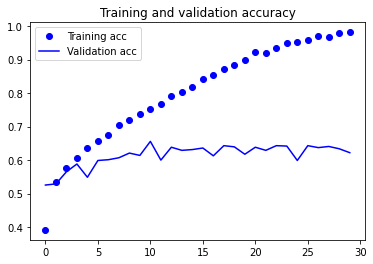

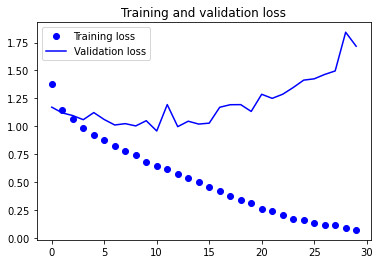

In [31]:
# Write your code here
model.save('flowers_small_1.h5')

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


### Predicting the test set

Apply now your network to the test set

In [32]:
# Write your code here
#test_loss, test_acc = model.evaluate(test_images, test_labels)

#predictions = model.predict(test_generator)??
#model.predict_classes(<numpy_array>)??
#score = model.evaluate(input_test, target_test, verbose=0)??


predictions = model.predict_generator(test_generator, workers = 1)
prediction_classes = np.argmax(predictions, axis=1)
test_classes = test_generator.classes

Report the accuracy as well as the classification report. Use sklearn functions

In [33]:
# Write your code here
print(predictions.size)
#print(prediction_classes.shape)
report = classification_report(test_classes, prediction_classes)
print(report)

4325
              precision    recall  f1-score   support

           0       0.23      0.17      0.19       175
           1       0.23      0.27      0.25       215
           2       0.18      0.16      0.17       148
           3       0.14      0.10      0.12       135
           4       0.21      0.27      0.23       192

    accuracy                           0.20       865
   macro avg       0.20      0.19      0.19       865
weighted avg       0.20      0.20      0.20       865



Print the confusion matrix

In [34]:
# Write your code here
print("Confusion matrix:\n%s" % confusion_matrix(test_classes, prediction_classes))

Confusion matrix:
[[29 47 25 23 51]
 [30 59 34 35 57]
 [18 46 24 13 47]
 [23 39 21 14 38]
 [27 70 27 17 51]]


Finally, run a model evaluation and store the loss and accuracy in the `test_loss_1` and `test_acc_1` variables. As with fitting, you may need to adjust the number of steps so that your network tests all the samples.

In [36]:
# Write your code here
#, the loss function as ‘categorical_crossentropy’

test_loss1, test_acc1 = model.evaluate_generator(test_generator, steps=43)
print('test acc:', test_acc1)
print('test loss:', test_loss1)

test acc: 0.6441860198974609
test loss: 1.4655539989471436


Try to improve your model by modifying some parameters and evaluate your network again.

## Using Image Augmentation

### Architecture

The flower dataset is relatively small. A way to expand such datasets is to generate artificial images by applying small transformations to existing images. Keras provides a built-in class for this: `ImageDataGenerator`. You will reuse it and apply it to the flower data set.
1. Using the network from the previous exercise, apply some transformations to your images. You can start from Chollet, Listing 5.11 (in notebook 5.2 also).
2. Report the training and validation losses and accuracies and comment on the possible overfit.
3. Apply your network to the test set and report the accuracy as well as the confusion matrix you obtained.


Write a new generator for the training set

In [120]:
# Write your code here
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        classes = categories,
        # Since we use categorical_crossentropy loss
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        classes = categories,
        # Since we use categorical_crossentropy loss
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size = (150,150),
        batch_size = 20,
        classes = categories,
        class_mode = 'categorical', 
        shuffle=False)

Found 3027 images belonging to 5 classes.
Found 865 images belonging to 5 classes.
Found 865 images belonging to 5 classes.


Fit a model. You reset the model by recreating it.

In [88]:
# Write your code here


model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(5, activation='softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

model2.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 15, 15, 128)     

In [89]:
#change steps epochs or validation steps?

#129 and 43? close enough i guess...

history2 = model2.fit_generator(
      train_generator,
      steps_per_epoch=129,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=43)

Epoch 1/30
129/129 [==============================] - 55s 430ms/step - loss: 1.4272 - acc: 0.3459 - val_loss: 1.2779 - val_acc: 0.4407
Epoch 2/30
129/129 [==============================] - 60s 461ms/step - loss: 1.2424 - acc: 0.4386 - val_loss: 1.2328 - val_acc: 0.5093
Epoch 3/30
129/129 [==============================] - 62s 484ms/step - loss: 1.1724 - acc: 0.4982 - val_loss: 1.1242 - val_acc: 0.5558
Epoch 4/30
129/129 [==============================] - 59s 460ms/step - loss: 1.1137 - acc: 0.5586 - val_loss: 1.1302 - val_acc: 0.5570
Epoch 5/30
129/129 [==============================] - 64s 495ms/step - loss: 1.0697 - acc: 0.5614 - val_loss: 1.0520 - val_acc: 0.5953
Epoch 6/30
129/129 [==============================] - 62s 484ms/step - loss: 1.0273 - acc: 0.5933 - val_loss: 1.0622 - val_acc: 0.6000
Epoch 7/30
129/129 [==============================] - 62s 481ms/step - loss: 1.0124 - acc: 0.6038 - val_loss: 0.9903 - val_acc: 0.6372
Epoch 8/30
129/129 [==============================] - 6

### Analyzing the fitting performance over epochs

Show the training accuracy along with the epochs

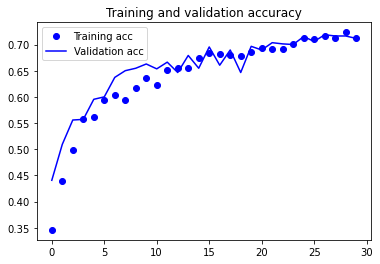

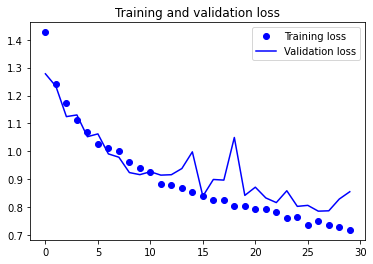

In [107]:
# Write your code here
model2.save('flowers_small_2.h5')

acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Predicting the test set

Finally, run a model evaluation and store the loss and accuracy in the `test_loss_2` and `test_acc_2` variables.

In [130]:
# Write your code here
test_loss2, test_acc2 = model2.evaluate_generator(test_generator,workers=1)
print('test acc:', test_acc2)
print('test loss:', test_loss2)


test acc: 0.7121387124061584
test loss: 0.8095804452896118


In [127]:
predictions = model2.predict_generator(test_generator,workers=1)
prediction_classes = np.argmax(predictions, axis=1)
test_classes = test_generator.classes

In [128]:
report = classification_report(test_classes, prediction_classes)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.55      0.69       175
           1       0.67      0.85      0.75       215
           2       0.62      0.67      0.64       148
           3       0.76      0.69      0.72       135
           4       0.70      0.76      0.73       192

    accuracy                           0.71       865
   macro avg       0.74      0.70      0.71       865
weighted avg       0.74      0.71      0.71       865



In [129]:
print("Confusion matrix:\n%s" % confusion_matrix(test_classes, prediction_classes))

Confusion matrix:
[[ 96  34  23   8  14]
 [  4 182   3  17   9]
 [  0  25  99   1  23]
 [  2  18   4  93  18]
 [  0  11  31   4 146]]


## Using a Pretrained Convolutional Base

### Architecture

Some research teams have trained convolutional neural networks on much larger datasets. We have seen during the lecture that the networks can model conceptual patterns as they go through the layers. This was identified by Le Cun in his first experiments [http://yann.lecun.com/exdb/lenet/](http://yann.lecun.com/exdb/lenet/). In this last part, you will train classifiers on top of a pretrained convolutional base.
1. Train your network and report the training and validation losses and accuracies.
2. Apply your network to the test set and report the accuracy as well as the confusion matrix you obtained.

In [11]:
from keras.applications import VGG16, InceptionV3

In [155]:
if PRETRAINED == 'VGG':
    conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
else:
    conv_base = InceptionV3(weights='imagenet',
                        include_top=False,
                        input_shape=(150, 150, 3))
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_224 (Conv2D)             (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 74, 74, 32)   96          conv2d_224[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 74, 74, 32)   0           batch_normalization_188[0][0]    
_______________________________________________________________________________________

As in Chollet, Listing 5.17 (in Chollet's notebook 5.3), you will program an `extract_features()` function.

In [183]:
# Write your code
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20



def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 3, 3, 2048))
    labels = np.zeros(shape=(sample_count, 5))
    generator = datagen.flow_from_directory(
                directory,
                target_size = (150,150),
                batch_size = 20,
                classes = categories,
                class_mode = 'categorical')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels




The features and labels

In [184]:
BATCH_SIZE_TRAIN = 3000
BATCH_SIZE_VAL = 865
BATCH_SIZE_TEST = 865

datagen = ImageDataGenerator(rescale=1./255)

train_features, train_labels = extract_features(train_dir, BATCH_SIZE_TRAIN)
validation_features, validation_labels = extract_features(validation_dir, BATCH_SIZE_VAL)
test_features, test_labels = extract_features(test_dir, BATCH_SIZE_TEST)


Found 3027 images belonging to 5 classes.
Found 865 images belonging to 5 classes.
Found 865 images belonging to 5 classes.


In [185]:
train_features = np.reshape(train_features, (train_features.shape[0], np.prod(train_features.shape[1:])))  # (2593, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (validation_features.shape[0], np.prod(validation_features.shape[1:]))) # (865, 4 * 4 * 512)
test_features = np.reshape(test_features, (test_features.shape[0], np.prod(test_features.shape[1:]))) # (865, 4 * 4 * 512))

Build a network that consists of the Inception V3 convolutional base and two dense layers.

In [234]:
# Write your code

model3 = models.Sequential()
model3.add(layers.Dense(256, activation='relu', input_dim=3 * 3 * 2048)) #512?
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(5, activation='softmax'))


Fit your network

In [235]:
# Write your code
model3.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

history3 = model3.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
150/150 [==============================] - 6s 37ms/step - loss: 1.2670 - acc: 0.5730 - val_loss: 0.7019 - val_acc: 0.7364
Epoch 2/30
150/150 [==============================] - 5s 36ms/step - loss: 0.7055 - acc: 0.7420 - val_loss: 0.5846 - val_acc: 0.7850
Epoch 3/30
150/150 [==============================] - 6s 38ms/step - loss: 0.5401 - acc: 0.8063 - val_loss: 0.5608 - val_acc: 0.7919
Epoch 4/30
150/150 [==============================] - 6s 41ms/step - loss: 0.4295 - acc: 0.8507 - val_loss: 0.5342 - val_acc: 0.8012
Epoch 5/30
150/150 [==============================] - 6s 40ms/step - loss: 0.3875 - acc: 0.8707 - val_loss: 0.5037 - val_acc: 0.8139
Epoch 6/30
150/150 [==============================] - 6s 40ms/step - loss: 0.3133 - acc: 0.8897 - val_loss: 0.4789 - val_acc: 0.8243
Epoch 7/30
150/150 [==============================] - 6s 42ms/step - loss: 0.2644 - acc: 0.9180 - val_loss: 0.4620 - val_acc: 0.8370
Epoch 8/30
150/150 [==============================] - 6s 40ms/step - 

### Analyzing the fitting performance over epochs

Show the training accuracy along with the epochs

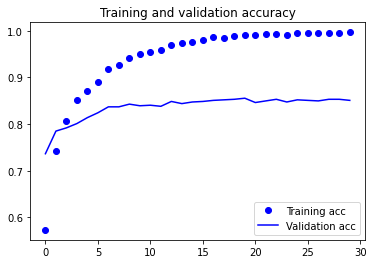

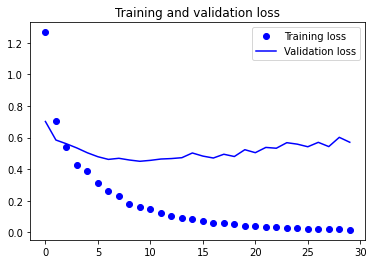

In [242]:
# Write your code here
model3.save('flowers_small_3.h5')

acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Predicting the test set

Apply now your network to the test set

In [243]:
# Write your code here
predictions = model3.predict(test_features)
prediction_labels = np.argmax(predictions, axis=1)
#test_classes = test_generator.classes

#train_features, train_labels 
#validation_features, validation_labels 
#test_features, test_labels

test_labels2 = np.argmax(test_labels, axis=1)


Report the accuracy as well as the classification report. Use sklearn functions

In [244]:
# Write your code here
report = classification_report(test_labels2, prediction_labels)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       175
           1       0.92      0.87      0.90       215
           2       0.77      0.82      0.79       148
           3       0.84      0.90      0.87       135
           4       0.88      0.81      0.84       192

    accuracy                           0.87       865
   macro avg       0.86      0.87      0.86       865
weighted avg       0.87      0.87      0.87       865



Print the confusion matrix

In [245]:
# Write your code here
print("Confusion matrix:\n%s" % confusion_matrix(test_labels2, prediction_labels))

Confusion matrix:
[[162   7   2   3   1]
 [  9 188   5  10   3]
 [  4   2 122   5  15]
 [  3   5   3 122   2]
 [  3   2  27   5 155]]


Finally, run a model evaluation and store the loss and accuracy in the `test_loss_3` and `test_acc_3` variables. As with fitting, you may need to adjust the number of steps so that your network tests all the samples.

In [246]:
# Write your code here
test_loss3, test_acc3 = model3.evaluate(test_features, test_labels)
print('test acc:', test_acc3)
print('test loss:', test_loss3)

28/28 [==============================] - 0s 4ms/step - loss: 0.4981 - acc: 0.8659
test acc: 0.8658959269523621
test loss: 0.49809959530830383


## Using a Pretrained Convolutional Base with Image Augmentation

### Architecture

1. Modify your program to include an image transformer. Train a new model. As a hint, you can make the whole convolutional base trainable and use the stochastic gradient descent as optimizer.
2. Apply your network to the test set and report the accuracy as well as the confusion matrix you obtained.

In [12]:
if PRETRAINED == 'VGG':
    conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
else:
    conv_base = InceptionV3(weights='imagenet',
                        include_top=False,
                        input_shape=(150, 150, 3))
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [263]:
# Write you code


Create the generators

In [13]:
# Write your code
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        classes = categories,
        # Since we use categorical_crossentropy loss
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        classes = categories,
        # Since we use categorical_crossentropy loss
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size = (150,150),
        batch_size = 20,
        classes = categories,
        class_mode = 'categorical', 
        shuffle=False)

Found 3027 images belonging to 5 classes.
Found 865 images belonging to 5 classes.
Found 865 images belonging to 5 classes.


Fit the model

In [23]:
# Write your code

#model4.add(conv_base)
#model4.add(layers.Flatten())

model4 = models.Sequential()
model4.add(conv_base)
model4.add(layers.Flatten())
model4.add(layers.Dense(256, activation='relu', input_dim=3 * 3 * 2048)) #512?
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(5, activation='softmax'))


model4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               4718848   
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 1285      
Total params: 26,522,917
Trainable params: 26,488,485
Non-trainable params: 34,432
_________________________________________________________________


In [24]:
model4.compile( optimizers.SGD(learning_rate=0.01, nesterov=True),
                #optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])
#nesterov=True
#learning_rate=0.01

history4= model4.fit(
        train_generator,
        steps_per_epoch=129,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=43)

Epoch 1/30
129/129 [==============================] - 326s 3s/step - loss: 1.0765 - acc: 0.5845 - val_loss: 0.6794 - val_acc: 0.7593
Epoch 2/30
129/129 [==============================] - 311s 2s/step - loss: 0.6847 - acc: 0.7488 - val_loss: 0.8880 - val_acc: 0.6942
Epoch 3/30
129/129 [==============================] - 310s 2s/step - loss: 0.5570 - acc: 0.8025 - val_loss: 0.4479 - val_acc: 0.8453
Epoch 4/30
129/129 [==============================] - 303s 2s/step - loss: 0.4844 - acc: 0.8266 - val_loss: 0.4080 - val_acc: 0.8500
Epoch 5/30
129/129 [==============================] - 290s 2s/step - loss: 0.4422 - acc: 0.8477 - val_loss: 0.5188 - val_acc: 0.8360
Epoch 6/30
129/129 [==============================] - 293s 2s/step - loss: 0.3955 - acc: 0.8566 - val_loss: 0.3854 - val_acc: 0.8756
Epoch 7/30
129/129 [==============================] - 294s 2s/step - loss: 0.3803 - acc: 0.8691 - val_loss: 0.3579 - val_acc: 0.8744
Epoch 8/30
129/129 [==============================] - 329s 3s/step - 

### Analyzing the fitting performance over epochs

Show the training accuracy along with the epochs

In [1]:
# write your code
model4.save('flowers_small_4.h5')

acc = history4.history['acc']
val_acc = history4.history['val_acc']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

NameError: name 'model4' is not defined

### Predicting the test set

Apply now your network to the test set

In [ ]:
# write your code

predictions = model2.predict_generator(test_generator,workers=1)
prediction_classes = np.argmax(predictions, axis=1)
test_classes = test_generator.classes


Report the accuracy as well as the classification report. Use sklearn functions

In [ ]:
# write your code
report = classification_report(test_classes, prediction_classes)
print(report)

Pretrained CNN with augmented images VGG
Class indices {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       175
           1       0.94      0.93      0.93       203
           2       0.85      0.92      0.88       158
           3       0.95      0.93      0.94       140
           4       0.92      0.89      0.91       189

    accuracy                           0.92       865
   macro avg       0.92      0.92      0.92       865
weighted avg       0.92      0.92      0.92       865

sklearn accuracy: 0.915606936416185


Print the confusion matrix

In [ ]:
# write your code
print("Confusion matrix:\n%s" % confusion_matrix(test_classes, prediction_classes))

Confusion matrix
[[160   8   3   1   3]
 [  5 189   3   3   3]
 [  4   1 145   1   7]
 [  3   3   3 130   1]
 [  2   1  16   2 168]]


Finally, run a model evaluation and store the loss and accuracy in the `test_loss_4` and `test_acc_4` variables. As with fitting, you may need to adjust the number of steps so that your network tests all the samples.

In [ ]:
# Write your code
test_loss4, test_acc4 = model2.evaluate_generator(test_generator,workers=1)
print('test acc:', test_acc4)
print('test loss:', test_loss4)

865/865 [==============================] - 18s 21ms/step - loss: 0.3596 - acc: 0.9156
Epochs 30
loss 0.3596470057964325 test acc: 0.9156069159507751


## Passing the Assignment

To pass the assignment, you need to reach an accuracy of 75 (even 80 ideally) with your best network.

In [ ]:
(test_loss1, test_acc1), (test_loss2, test_acc2), (test_loss3, test_acc3), (test_loss4, test_acc4)

((4.041093349456787, 0.684393048286438),
 (3.537476062774658, 0.684393048286438),
 (1.950987696647644, 0.8323699235916138),
 (0.3596470057964325, 0.9156069159507751))

## Report

You will write a short report of about two pages on your experiments:
1. You will describe the architectures you designed and the results you obtained;
2. You will run Chollet's notebook 5.4 and read the article _Grad-CAM: Visual Explanations from Deep Networks via Gradient-based Localization_ by Selvaraju et al. From this, you will reformulate and comment the paragraph on _Visualizing heatmaps of class activation_ in the notebook. 
3. You will run it on one of your images.

You will submit this report through Canvas.

(1, 150, 150, 3)


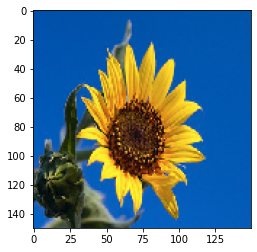

In [253]:
img_path = '/Users/thoma/Desktop/EDAN95/lab3/archive/flowers/sunflower/164670455_29d8e02bbd_n.jpg'


from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

plt.imshow(img_tensor[0])
plt.show()
